# "Восприятие отношения общества на Арабо-Израильский конфликт, на основе комментариев в сетях и лайках к ним. Аналитика в разрезе тенденций по временным рядам, и  создание модели предсказания к повышению или понижению негативного(позитивного) тренда"
<center> <img src = http://www.friendsofisraelinitiative.org//contents/uploads/articles/israeli-palestinian-conflict-photo.png alt="drawing" style="width:800px;">


Введение: 
- Палестино-Израильский конфликт в последнее время стал широко обсуждаемой и чувствительной темой.
- Наш диплом будет основана на соревновании Kaggle.

Описание проекта:
`` Этот набор данных содержит комментарии к сообщениям Reddit, связанным с текущей ситуацией в Израиле и секторе Газа.
Анализируя эти комментарии, мы можем получить представление о предубеждениях и принадлежности комментаторов, а также об их поддержке различных вовлеченных сторон.
Этот набор данных обновляется ежедневно, предоставляя полное и актуальное представление об мнениях, выраженных на Reddit по поводу этого конфликта. ``

О наборе данных: 

Данные представлены в формате CSV. 

Список столбцов и их краткое описание: 
- comment_id - уникальный номер коментария	
- score - счетчик 
- self_text	- текст
- subreddit	 - в какому разделе относится
- created_time	- время создание комментария




In [430]:

# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from textblob import TextBlob
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Для графиков

%matplotlib inline


In [431]:
# загрузим наши данные
chat_data=pd.read_csv('reddit_24_11.csv', parse_dates=['created_time'])


Проведем разведательный анализ

In [432]:
chat_data.head()

,comment_id,score,self_text,subreddit,created_time
0,k67qo4f,1,"Thank you for posting in r/Palestine, but unfo...",Palestine,2023-10-24 11:22:51
1,k67qlnq,1,yeah - he became a basketball reporter for a w...,worldnews,2023-10-24 11:22:03
2,k67qkyv,1,"Americans,Israeli's and the Sunni's don't want...",worldnews,2023-10-24 11:21:49
3,k67qkjq,1,Yes,worldnews,2023-10-24 11:21:41
4,k67qjsi,1,&amp;#x200B;\n\n&amp;#x200B;\n\nhttps://previe...,IsraelPalestine,2023-10-24 11:21:27


In [433]:
chat_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338952 entries, 0 to 338951
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   comment_id    338952 non-null  object        
 1   score         338952 non-null  int64         
 2   self_text     338952 non-null  object        
 3   subreddit     338952 non-null  object        
 4   created_time  338952 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 12.9+ MB


In [434]:
# проверка на пропуски
chat_data.isnull().sum()

comment_id      0
score           0
self_text       0
subreddit       0
created_time    0
dtype: int64

In [435]:
# проверка на дубликаты
chat_data.duplicated().sum()

0

In [436]:
# вывод осноаных статистик
chat_data.describe(include=object)

,comment_id,self_text,subreddit
count,338952,338952,338952
unique,338952,332023,14
top,k67qo4f,your comment has been removed for having a low...,IsraelPalestine
freq,1,254,103500


In [437]:
#столбец comment_id не имеет ценности, переделаем для удобства на счетчик комментариев
chat_data['comment_id']= np.nan
chat_data['comment_id'] = chat_data['comment_id'].fillna(1)
chat_data['comment_id'] = chat_data['comment_id'].astype(int)
chat_data


,comment_id,score,self_text,subreddit,created_time
0,1,1,"Thank you for posting in r/Palestine, but unfo...",Palestine,2023-10-24 11:22:51
1,1,1,yeah - he became a basketball reporter for a w...,worldnews,2023-10-24 11:22:03
2,1,1,"Americans,Israeli's and the Sunni's don't want...",worldnews,2023-10-24 11:21:49
3,1,1,Yes,worldnews,2023-10-24 11:21:41
4,1,1,&amp;#x200B;\n\n&amp;#x200B;\n\nhttps://previe...,IsraelPalestine,2023-10-24 11:21:27
...,...,...,...,...,...
338947,1,42,US. This is bullshit,Palestine,2023-10-07 05:20:11
338948,1,1,I am in the United States and it has the dotte...,Palestine,2023-10-07 05:17:23
338949,1,54,In which country are you?\nSometimes maps adap...,Palestine,2023-10-07 05:08:26
338950,1,116,You can't give up on something you only preten...,worldnews,2023-10-07 01:46:05


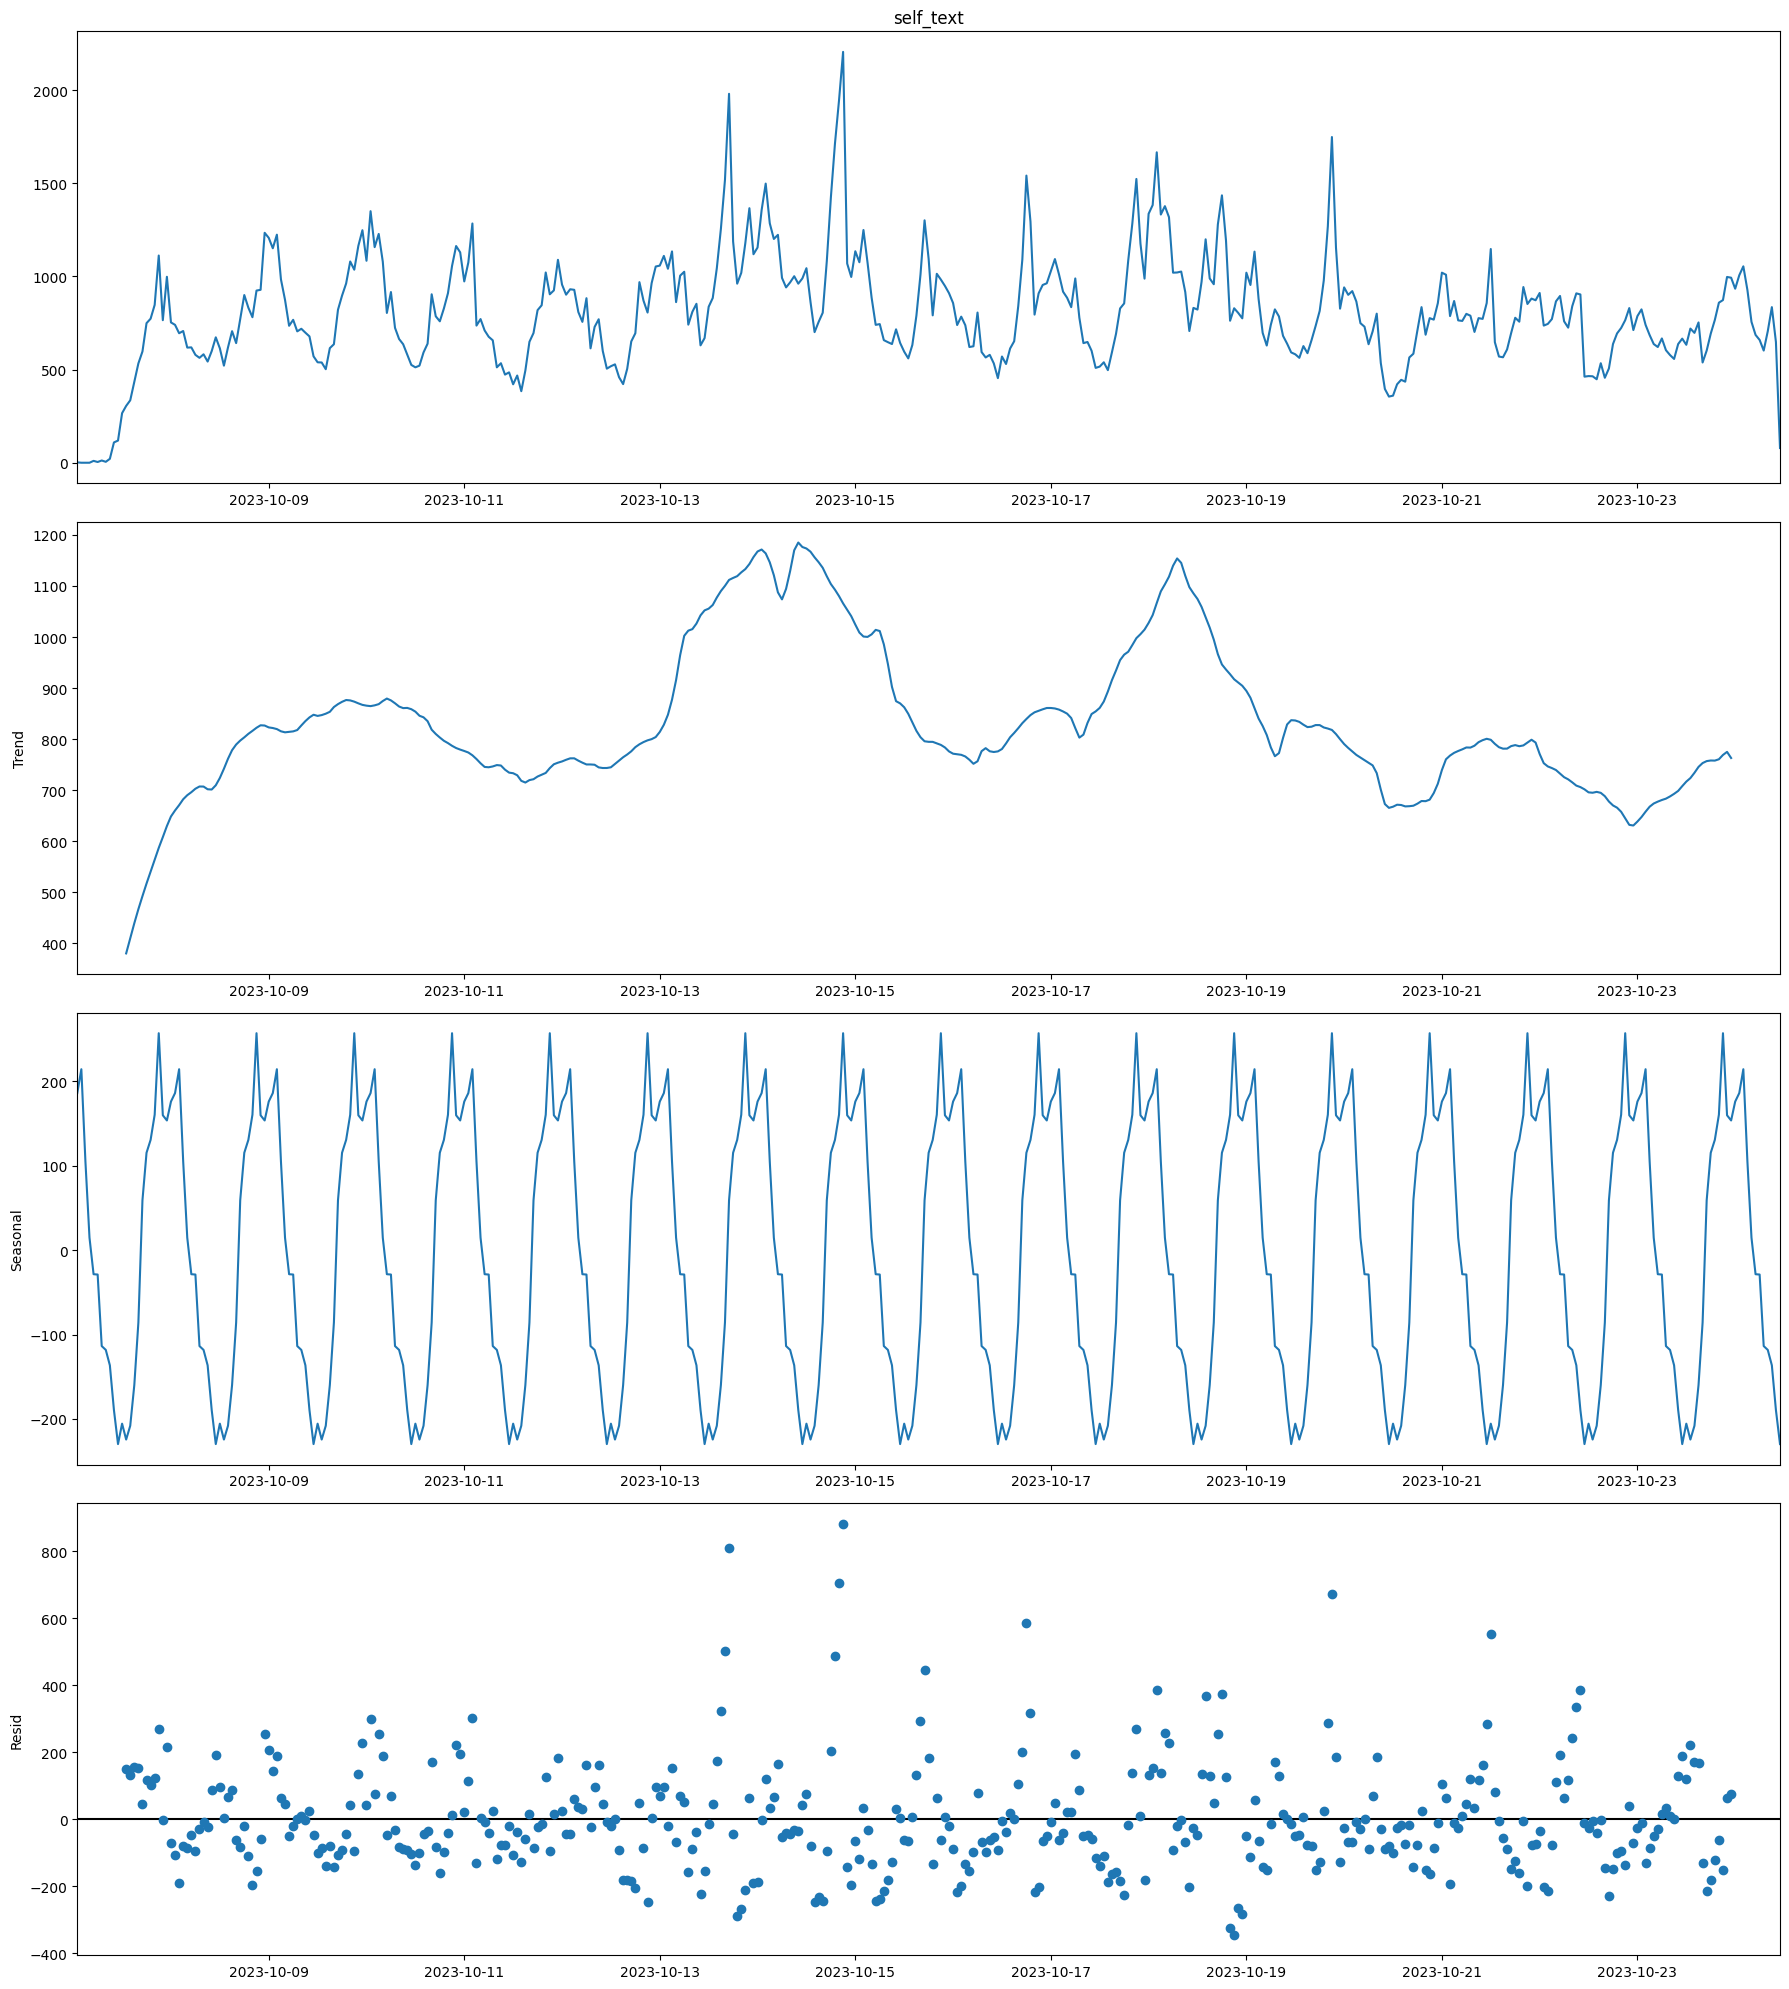

In [438]:
# Посмотрим на графики по комментариям  используя DOWNSAMPLING с параметром 1 час
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(chat_data.resample('1H', on='created_time')['self_text'].count())
result.plot()
plt.show()

Присутсвует явная сезонность, а так же выделяются комментарии с большим колличеством лайков.

<AxesSubplot: xlabel='created_time'>

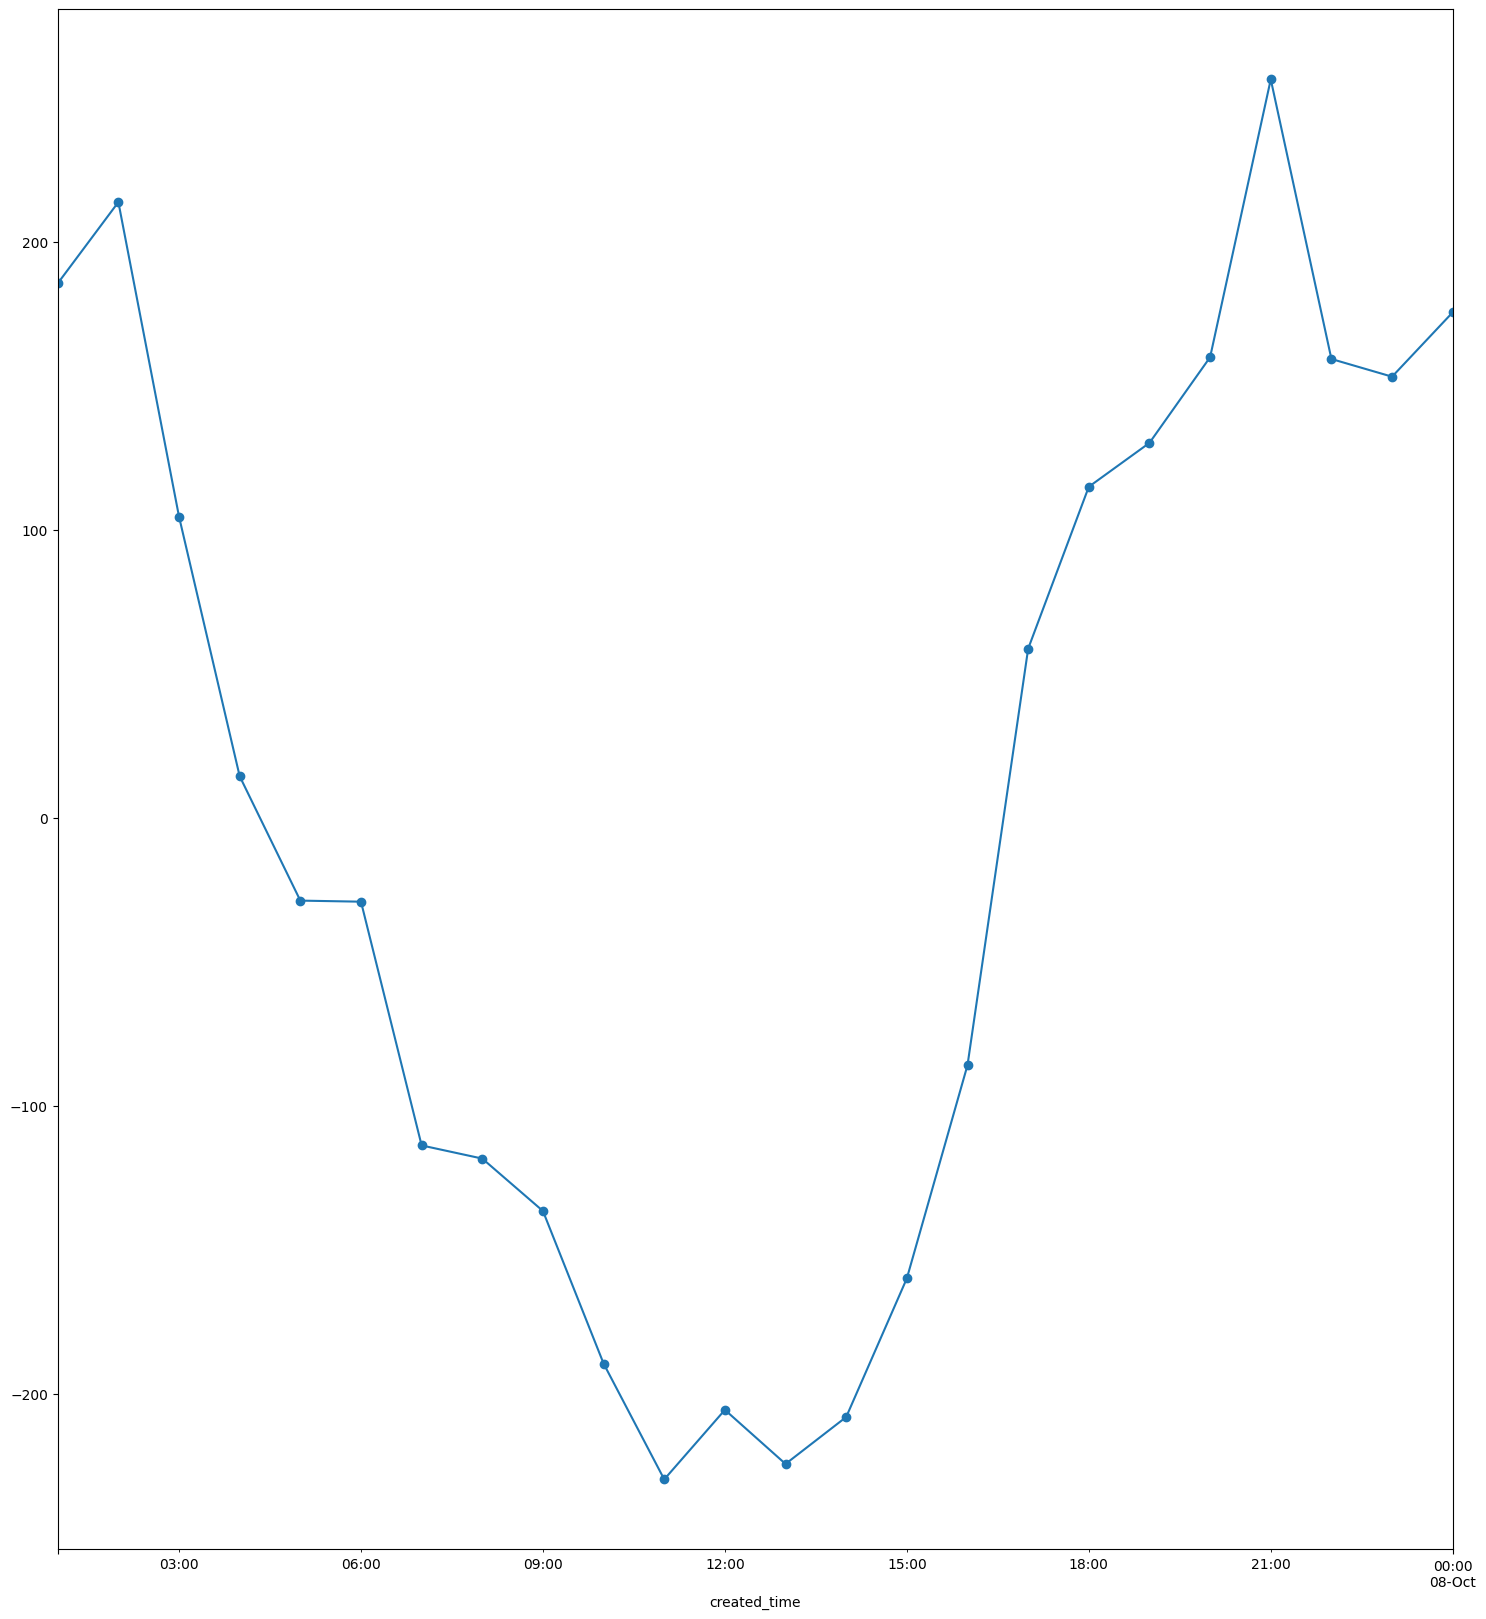

In [440]:
# есть отчетливая сезонность по часам, рассмотрим её более подробно
result.seasonal[:24].plot(marker="o")

In [441]:
# создадим функцию распределения комментариев на позитивные негативные и нейтральные
def predict_sentiment(text: str) -> str:
    blob = TextBlob(text)
    
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [442]:
# Применим функцию и приведем к типу категория
chat_data['sentiment'] = chat_data['self_text'].apply(predict_sentiment)
chat_data['sentiment'] = chat_data['sentiment'].astype('category')
chat_data['sentiment'].value_counts()
    

Positive    147456
Neutral      99037
Negative     92459
Name: sentiment, dtype: int64

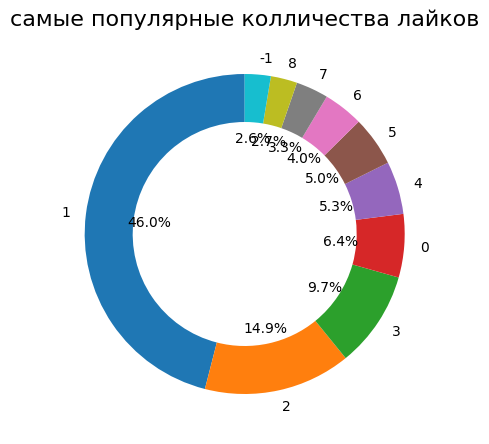

In [443]:
# посмотрим на распределение лайков\дизлайков

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes((1, 1, 1, 1))
score_count = chat_data['score'].value_counts().sort_values(ascending=False).head(10)
pie = ax.pie(
    score_count,
    labels=score_count.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)
title = ax.set_title('самые популярные колличества лайков', fontsize=16)
plt.show(pie)

Почти половина комментариев имеет лайк, а с двумя лайками больше половины. 
Явное преимущество лайков над дизлайками.

In [444]:
# Выведим 10 первых комментариев по лайкам/дизлайкам  и посмотрим на распределение.
display(chat_data.sort_values('score', ascending=False, ignore_index=True).head(10))
display(chat_data.sort_values('score', ascending=False, ignore_index=True).tail(10))

,comment_id,score,self_text,subreddit,created_time,sentiment
0,1,16463,That’s pretty damning for Netanyahu and Israel...,worldnews,2023-10-11 21:33:30,Positive
1,1,14619,Israel said there would be no humanitarian bre...,worldnews,2023-10-12 16:41:56,Positive
2,1,11742,Now if we could get a source not affiliated ei...,worldnews,2023-10-18 01:21:54,Positive
3,1,10421,This weekend is going to be very ugly in the M...,worldnews,2023-10-07 15:56:03,Negative
4,1,10090,This is not going to end well. shit,PublicFreakout,2023-10-07 23:19:49,Negative
5,1,8857,Theres a lot of people out there who should ha...,worldnews,2023-10-18 14:47:17,Positive
6,1,8708,"&gt;""These Palestinian people, they're victims...",worldnews,2023-10-13 19:47:57,Positive
7,1,8493,It is shockingly easy to go through life witho...,worldnews,2023-10-10 23:47:09,Positive
8,1,8257,Giving South Park “we’re sorry” energy,worldnews,2023-10-14 22:03:19,Negative
9,1,8225,It's such a disaster that I don't see how Neta...,worldnews,2023-10-11 21:37:34,Negative


,comment_id,score,self_text,subreddit,created_time,sentiment
338942,1,-351,They're doing it because western pressure and ...,worldnews,2023-10-13 23:08:41,Negative
338943,1,-371,"how gentle, smh",CombatFootage,2023-10-07 21:18:30,Positive
338944,1,-438,Because if you know anything about this confli...,CombatFootage,2023-10-18 00:24:56,Neutral
338945,1,-521,First part was accurate. Second part was aston...,NonCredibleDefense,2023-10-20 22:44:42,Positive
338946,1,-548,the defensive approach taken by using iron dom...,CombatFootage,2023-10-07 12:14:58,Positive
338947,1,-569,They don't have to. The IDF does it for them.\...,worldnews,2023-10-23 15:20:15,Neutral
338948,1,-605,Not necessarily. Targeting civilians is typica...,PublicFreakout,2023-10-16 23:46:31,Negative
338949,1,-763,"For once, an actual proven military target.",CombatFootage,2023-10-13 22:02:00,Negative
338950,1,-934,too bad its pretty much pointless when they fi...,CombatFootage,2023-10-07 12:07:48,Negative
338951,1,-1372,Yeah and what does that change? IDF just came ...,CombatFootage,2023-10-18 00:14:14,Positive


In [445]:
# создадим функцию распределения subreddit на самые популярные и другие
def categorize_subreddit(column):
    counts = column.value_counts()
    return column.apply(lambda x: 'other' if counts[x] < 1000 else x)

In [446]:
# применим функцию и привидем к типу категория
chat_data['subreddit_cat'] = categorize_subreddit(chat_data['subreddit'])
chat_data['subreddit_cat'] = chat_data['subreddit_cat'].astype('category')

In [447]:
#удалим столбецы с текстами и разделы реддита, так как они больше не нужены
chat_data.drop(['self_text', 'subreddit'], axis=1, inplace=True)

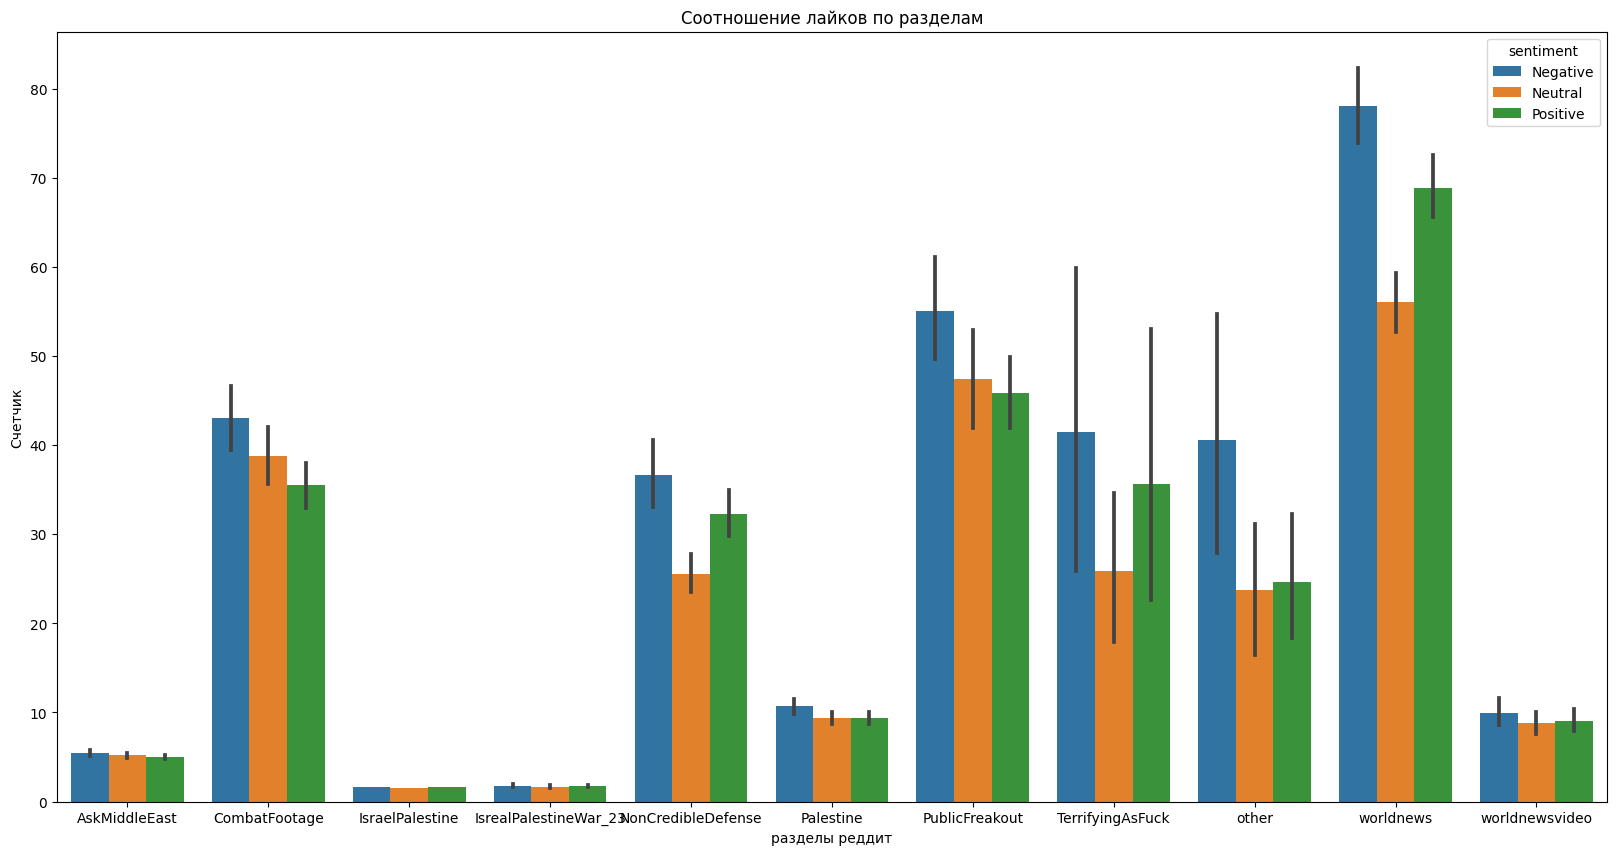

In [448]:
# Соотношение лайков по разделам
plt.figure(figsize=(20, 10))  
sns.barplot(data=chat_data, x='subreddit_cat', y='score', hue='sentiment')

plt.title('Соотношение лайков по разделам')  
plt.ylabel('Счетчик')  
plt.xlabel('разделы реддит')  

plt.show()  

Картина по разделам, не дает нам какой-либо полезной информации.

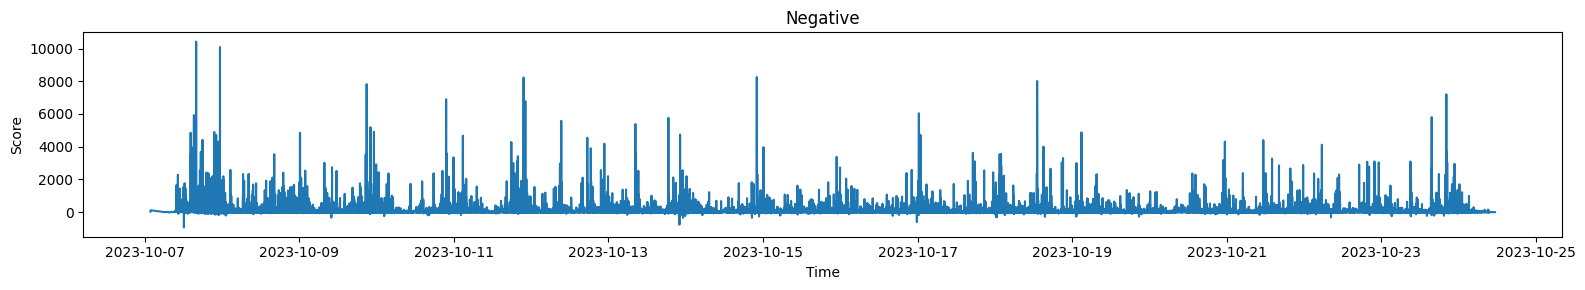

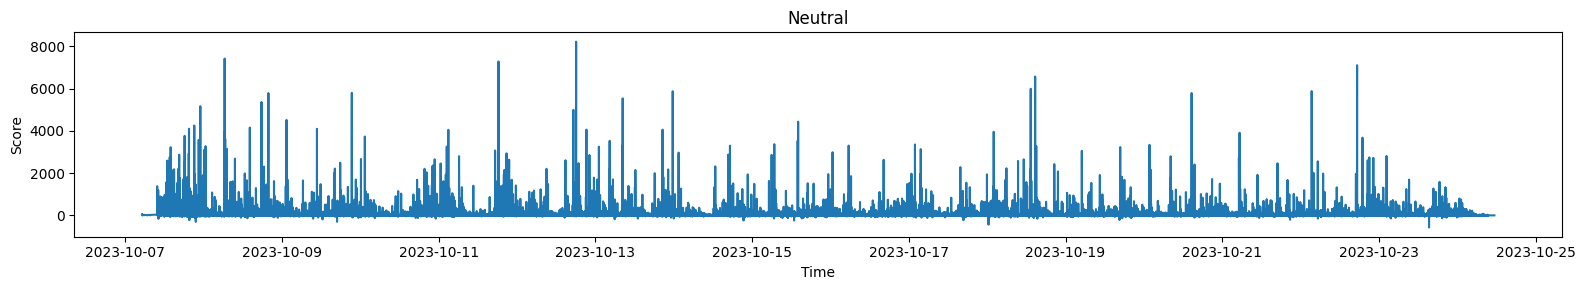

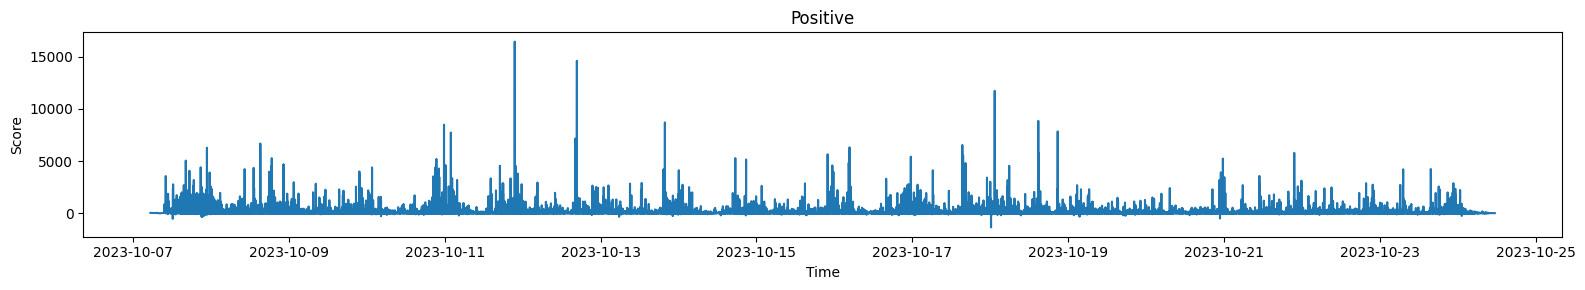

In [449]:
# построим графики временных рядов по отношению к комментариям.
for sentiment, group in chat_data.groupby('sentiment'):
    plt.figure(figsize=(16, 3))
    plt.plot(group['created_time'], group['score'])
    plt.title(sentiment)
    plt.xlabel('Time')
    plt.ylabel('Score')
    plt.tight_layout()
    plt.show()

In [450]:
#проверка dataframe 
chat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338952 entries, 0 to 338951
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   comment_id     338952 non-null  int32         
 1   score          338952 non-null  int64         
 2   created_time   338952 non-null  datetime64[ns]
 3   sentiment      338952 non-null  category      
 4   subreddit_cat  338952 non-null  category      
dtypes: category(2), datetime64[ns](1), int32(1), int64(1)
memory usage: 7.1 MB


In [451]:
# Разделы реддита, не имеют для нас ценности, удалим их
chat_data=chat_data.drop('subreddit_cat', axis=1)

In [452]:
# Сохраним наши предобработанные данные в CSV-файл
chat_data.to_csv("clean_data.csv", index=False)